# Biomedical Data Science Homework 2

### Importing the dataset into the notebook

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('data.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### Checking dataset for missing values to see if pre-processing needed

In [54]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [28]:
df.shape

(195, 24)

### Splitting dataset into training and test sets via holdout

In [29]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 1:23].values
y = df.iloc[:, 23].values
LE = LabelEncoder()
y = LE.fit_transform(y)
LE.classes_

array([0, 1], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [31]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


### Applying GridSearch to find best k for nearest neighbor algorithm

In [32]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = [4,5,6,7,8,9,10]
knn = KNeighborsClassifier(n_neighbors=k_range)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8012820512820513
{'n_neighbors': 6}


According to the GridSearch function, the best parameter is k=6 with a mean of 0.8013

In [33]:
grid.grid_scores_

[mean: 0.77564, std: 0.09329, params: {'n_neighbors': 4},
 mean: 0.77564, std: 0.06336, params: {'n_neighbors': 5},
 mean: 0.80128, std: 0.06369, params: {'n_neighbors': 6},
 mean: 0.80128, std: 0.07649, params: {'n_neighbors': 7},
 mean: 0.80128, std: 0.07990, params: {'n_neighbors': 8},
 mean: 0.79487, std: 0.08571, params: {'n_neighbors': 9},
 mean: 0.79487, std: 0.08749, params: {'n_neighbors': 10}]

I displayed all the scores so that I could compare them and confirm the results. The highest mean score is observed when k is 6, 7, or 8. Of these three values, the standard deviation is lower with k=6 so it is more precise than the other 2, making it the best overall k value for the knn algorithm. 

In [34]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7756410256410257, 0.7756410256410257, 0.8012820512820513, 0.8012820512820513, 0.8012820512820513, 0.7948717948717948, 0.7948717948717948]


Text(0,0.5,'Cross-Validated Accuracy')

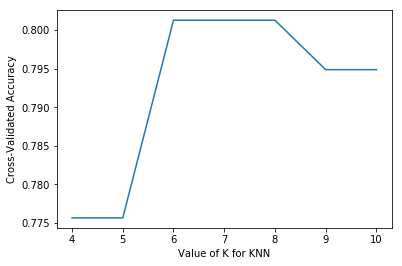

In [35]:
import matplotlib.pyplot as plt
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

I quickly plotted the different k values and their accuracy scores as a way to visually compare them and confirm my initial decision that k=6 is the best value. 

### Plotting the Learning Curve to visualize training and validation accuracies 

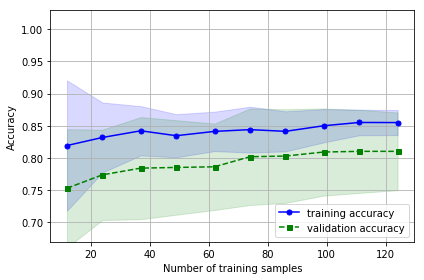

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit

cv=ShuffleSplit(n_splits=30,test_size=0.2,random_state=1)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=grid.best_estimator_,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=cv,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.67, 1.03])
plt.tight_layout()
plt.show()

It appears that the two curves are getting closer in accuracy as the number of training samples increases as there is more overlap between the variation between the two. 

### Plotting the Validation Curve for the Training and Validation Accuracy

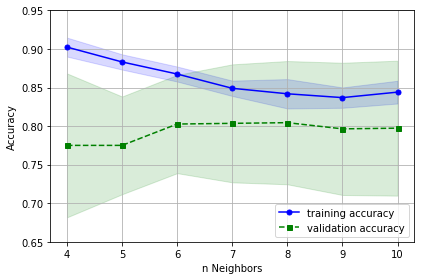

In [52]:
from sklearn.model_selection import validation_curve


param_range = [4, 5, 6, 7, 8, 9 , 10]
train_scores, test_scores = validation_curve(
                estimator=grid.estimator, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()

plt.legend(loc='lower right')
plt.xlabel('n Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.65, 0.95])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

The 2 curves show a general trend where they are getting closer as the number of neighbors used for the knn algorithm increases because the means are closer and the standard deviations overlap. However, we can again see that the best k value for the validation accuracy was 6 because it shows the highest accuracy and smallest spread in terms of standard deviation. 